#Задание 1

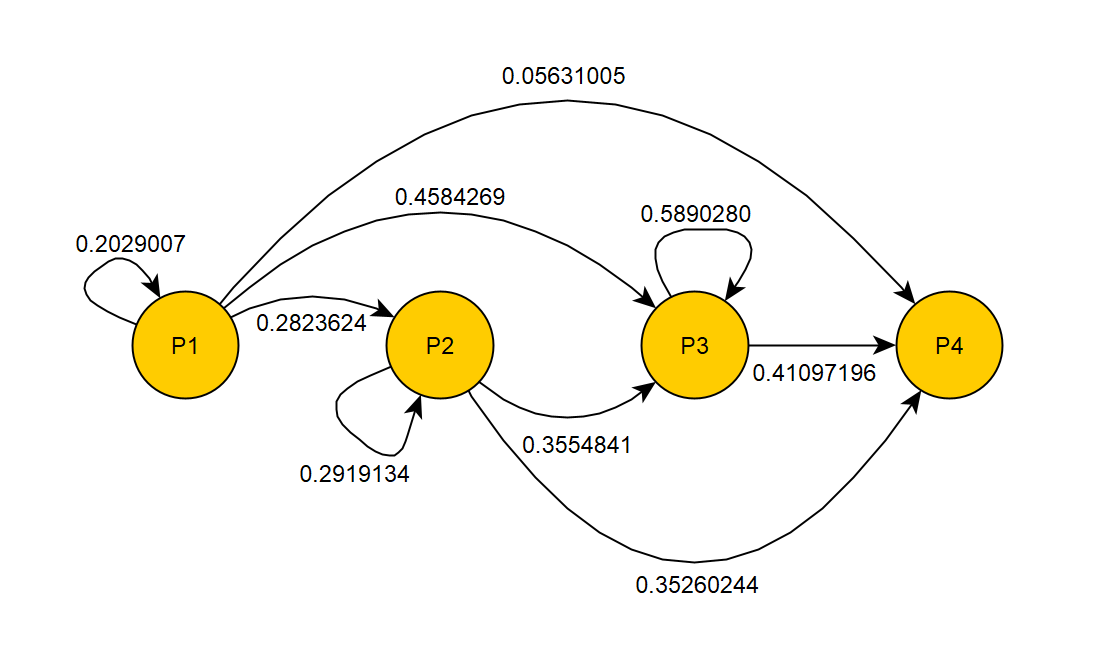

In [ ]:
Variant<-10
set.seed(Variant) 
k<-sample(c(4:9),1)
pp1<-runif(4)
pp2<-runif(3)
pp3<-runif(2)
p1<-pp1/sum(pp1)
p2<-c(c(0),pp2/sum(pp2))
p3<-c(c(0,0),pp3/sum(pp3))
p4<-c(0,0,0,1)
P<-data.frame()
P<-rbind(P,p1)
P<-rbind(P,p2)
P<-rbind(P,p3)
P<-rbind(P,p4)
rownames(P)<-c("p1","p2","p3","p4")
colnames(P)<-c("","","","")
View(P)
print(paste("k=",as.character(k)))

p1 0.2029007 0.2823624 0.4584269 0.05631005
p2 0.0000000 0.2919134 0.3554841 0.35260244
p3 0.0000000 0.0000000 0.5890280 0.41097196
p4 0.0000000 0.0000000 0.0000000 1.00000000

[1] "k= 6"


In [ ]:
P<-matrix(c(0.2029007,	0.2823624,	0.4584269,	0.05631005, 0.0000000,	0.2919134,	0.3554841,	0.35260244,0.0000000,	0.0000000,	0.5890280,	0.41097196,0.0000000,0.0000000,0.0000000,1.00000000), ncol=4, nrow=4, byrow=TRUE)
p0<-matrix(c(1, 0, 0, 0), ncol=4, nrow=1, byrow=TRUE)

In [ ]:
install.packages("matrixcalc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(matrixcalc)

При k = 4

In [ ]:
k<-4

In [ ]:
p0 %*% matrix.power(P,k)

[,1]        [,2]       [,3]      [,4]    
[1,] 0.001694861 0.01765772 0.2236164 0.757031

При k = 5

In [ ]:
k<-5
p0 %*% matrix.power(P,k)

[,1]         [,2]       [,3]      [,4]     
[1,] 0.0003438886 0.00563309 0.1387703 0.8552527

При k = 6

In [ ]:
k<-6
p0 %*% matrix.power(P,k)

[,1]         [,2]        [,3]       [,4]    
[1,] 6.977523e-05 0.001741476 0.08389973 0.914289

Вычислим экспериментально

In [ ]:
get_vector <- function(k) {
  vec_sost <- c()
  for (i in (1:100000)) {
    sost<-1
    for (k in(1:k)){
      p<-runif(1)
      if (sost == 1) {
        if(p >= 0.2029007+0.2823624+0.4584269) {
          sost<-4
        } else if (p >= 0.2029007+0.2823624) {
          sost<-3
        } else if (p >= 0.2029007) {
          sost<-2
        }
      } else if (sost == 2) {
        if(p >= 0.2919134+0.3554841) {
          sost<-4
        } else if (p >= 0.2919134) {
          sost<-3
        }
      } else if (sost == 3) {
        if(p >= 0.5890280) {
          sost<-4
        }
      }
    }
    vec_sost[i] <- sost
  }
  return (vec_sost)
}


Для k = 4

In [ ]:
vec_sost <- get_vector(4)
table(vec_sost)/sum(table(vec_sost))

vec_sost
      1       2       3       4 
0.00159 0.01802 0.22406 0.75633 

Для k = 5

In [ ]:
vec_sost <- get_vector(5)
table(vec_sost)/sum(table(vec_sost))

vec_sost
      1       2       3       4 
0.00037 0.00552 0.14022 0.85389 

Для k = 6

In [ ]:
vec_sost <- get_vector(6)
table(vec_sost)/sum(table(vec_sost))

vec_sost
      1       2       3       4 
0.00004 0.00171 0.08338 0.91487 

#Задание 2

In [ ]:
Variant<-10
set.seed(Variant) 
k<-sample(c(10:25),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,t1,t2))

k  t1 t2
1 20 14 3

Очевидно, что поток приходящих заявок 20/14 много больше потока обработки 1/3, что приводит к замыканию очереди. Для практического смысла задания было принято решение обозначить приходящий поток заявок как 1/7 (3 программиста со временем выполнения 21 минута).

In [ ]:
t1 <- 21
k <- 3
t2 <- 5
lambda <- k/t1
mu <- 1/t2
ro <- lambda / mu

In [ ]:
#вероятность того, что программа будет выполнена сразу же, как только она поступила на терминал
P0 <- 1 - ro

#вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал
Pn <- 1 - P0

#среднее время до получения пользователем результатов реализации
Tsist <- 1/(mu * (1 - ro))
Tget <- Tsist

#среднее количество программ, ожидающих выполнения на сервере
Loch <- ro^2/(1 - ro)

paste <- "--------------------------------------------------------------"
View(paste)

View("среднее время до получения пользователем результатов реализации")
Tget
View(paste)
View("среднее количество программ, ожидающих выполнения на сервере")
Loch
View(paste)
View("вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал")
Pn
View(paste)

[1] "--------------------------------------------------------------"

[1] "среднее время до получения пользователем результатов реализации"

[1] 17.5

[1] "--------------------------------------------------------------"

[1] "среднее количество программ, ожидающих выполнения на сервере"

[1] 1.785714

[1] "--------------------------------------------------------------"

[1] "вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал"

[1] 0.7142857

[1] "--------------------------------------------------------------"

Найдем экспериментально

In [ ]:
t1 <- 21
t2 <- 5
Tend <- 1000000
k = 3
tsys <- 0

progs <- c(1:k * 2)
counter_deploy <- 1
counter_ready <- 1

system_count <- 1
last_switch <- 0

Pn_vec <- c(0,0)
Tget_vec <- c()
Loch_vec <- c(0)

for (i in 1:k) {
  progs[i] <- tsys + rexp(1, 1 / t1)
}
for (i in (k+1):(2*k)) {
  progs[i] <- 0
}

sys_free <- TRUE
ready_time <- Tend + 1
oba <- 9


while (tsys < Tend) {
  if (is.na(Loch_vec[system_count])) {Loch_vec[system_count] <- 0}
  Loch_vec[system_count] <- Loch_vec[system_count] + tsys - last_switch
  last_switch <- tsys


  for (i in 1:k) {
    if (tsys == progs[i]){

      if (counter_deploy == counter_ready) {
        Pn_vec[1] <- Pn_vec[1] + 1
      }
      else {Pn_vec[2] <- Pn_vec[2] + 1}

      Tget_vec[counter_deploy] <- progs[i]
      counter_deploy <- counter_deploy + 1
      progs[i] <- tsys + rexp(1, 1 / t1)
      progs[i + k] <- tsys
      system_count <- system_count + 1
    }
  }

  if (tsys == ready_time) {
    Tget_vec[counter_ready] <- tsys - Tget_vec[counter_ready]
    counter_ready <- counter_ready + 1
    sys_free <- TRUE
    
  }

  if (sys_free) {
    if (counter_deploy > counter_ready) {
      ready_time <- tsys + rexp(1, 1/t2)
      sys_free <- FALSE
      system_count <- system_count - 1
    }
    else {
      ready_time <- Tend + 1
    }
  }

  tsys <- min(progs[1:k], ready_time)
}

Tget_vec <- Tget_vec[1:counter_ready - 1]
paste <- "--------------------------------------------------------------"
View(paste)
View("среднее время до получения пользователем результатов реализации")
mean(Tget_vec)

Loch_vec_P <- Loch_vec / sum(Loch_vec)
Loch <- 0
for (i in 1:length(Loch_vec)) {
  Loch <- Loch + (i - 1) * Loch_vec_P[i]
}

View(paste)
View("среднее количество программ, ожидающих выполнения на сервере.")
Loch

Pn <- Pn_vec[2]/sum(Pn_vec)

View(paste)
View('вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал')
Pn

[1] "--------------------------------------------------------------"

[1] "среднее время до получения пользователем результатов реализации"

[1] 17.34302

[1] "--------------------------------------------------------------"

[1] "среднее количество программ, ожидающих выполнения на сервере."

[1] 1.756106

[1] "--------------------------------------------------------------"

[1] "вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал"

[1] 0.7108184